In [ ]:
#Elshaday Assefa_coronovirus

In [1]:
import spacy
from spacy.cli import download
print(download('en_core_web_lg'))




✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
None


In [2]:
nlp = spacy.load("en_core_web_lg")


In [3]:
from newsapi import NewsApiClient
newsapi = NewsApiClient (api_key='PLACE_API_KEY_HERE')

In [5]:
def getSomething(x):
    temp = newsapi.get_everything(q='coronavirus', language='en', 
                                  from_param='2020-10-02', to='2020-11-01', 
                                  sort_by='relevancy', page=x)
    return temp

articles = list(map(getSomething, range(1,6)))

In [6]:
import pandas as pd

In [7]:
dados = []

for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        dados.append({'title':title[0], 'desc':description[0], 'content':content})
        
        
        df = pd.DataFrame(dados)
        df = df.dropna()
        df.head()

In [8]:
print (df)

   title desc                                            content
0      S    M  Mouthwash is designed to kill germs in your mo...
1      C    N  Navigating air travel during the COVID-19 pand...
2      T    T  The tweet violated the platforms rules against...
3      C    A  The coronavirus pandemic is already shaping ho...
4      C    W  Many leaders most notably President Trump have...
..   ...  ...                                                ...
95     A    C  LiveUpdated Oct. 20, 2020, 6:06 a.m. ET\r\nOct...
96     A    Y  You can order a self-driving car on Lyft again...
97     E    B  As cases in Belgium surge, bars and cafes have...
98     S    E  Senator Marsha Blackburn of Tennessee, a Repub...
99     C    W  The Centers for Disease Control and Prevention...

[93 rows x 3 columns]


In [9]:
from spacy.tokens import Token



In [10]:
text = df[['content']].copy()

In [11]:
print(df)

   title desc                                            content
0      S    M  Mouthwash is designed to kill germs in your mo...
1      C    N  Navigating air travel during the COVID-19 pand...
2      T    T  The tweet violated the platforms rules against...
3      C    A  The coronavirus pandemic is already shaping ho...
4      C    W  Many leaders most notably President Trump have...
..   ...  ...                                                ...
95     A    C  LiveUpdated Oct. 20, 2020, 6:06 a.m. ET\r\nOct...
96     A    Y  You can order a self-driving car on Lyft again...
97     E    B  As cases in Belgium surge, bars and cafes have...
98     S    E  Senator Marsha Blackburn of Tennessee, a Repub...
99     C    W  The Centers for Disease Control and Prevention...

[93 rows x 3 columns]


In [12]:
print(text)

                                              content
0   Mouthwash is designed to kill germs in your mo...
1   Navigating air travel during the COVID-19 pand...
2   The tweet violated the platforms rules against...
3   The coronavirus pandemic is already shaping ho...
4   Many leaders most notably President Trump have...
..                                                ...
95  LiveUpdated Oct. 20, 2020, 6:06 a.m. ET\r\nOct...
96  You can order a self-driving car on Lyft again...
97  As cases in Belgium surge, bars and cafes have...
98  Senator Marsha Blackburn of Tennessee, a Repub...
99  The Centers for Disease Control and Prevention...

[93 rows x 1 columns]


In [13]:
nlp = spacy.load('en_core_web_sm')
#txt = text.content.str.cat(sep = ' ')

In [14]:
import string
import collections
hot_words = []


def get_keywords(content):
    punctuation = string.punctuation
    result = [] 
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(content.lower())
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

for ind in text.index:
    hotwords = get_keywords(text['content'][ind])
    top_five = [('#' + x[0]) for x in collections.Counter(hotwords).most_common(5)]
    hot_words.append(top_five)

#hotwords = set(get_keywords(txt))

In [15]:
print(hot_words)

[['#mouthwash', '#germs', '#mouth', '#good', '#job'], ['#air', '#travel', '#covid-19', '#pandemic', '#tricky'], ['#tweet', '#platforms', '#rules', '#coronavirus', '#misinformation'], ['#pandemic', '#coronavirus', '#home', '#design', '#trends'], ['#leaders', '#president', '#trump', '#arrival', '#coronavirus'], ['#europe', '#second', '#wave', '#countries', '#situation'], ['#students', '#old', '#catholic', '#priest', '#campus'], ['#season', '#october', '#year', '#coney', '#amusement'], ['#apoorva', '#mandavilli', '#science', '#global', '#health'], ['#new', '#york', '#city', '#largest', '#resurgence'], ['#trump', '#lady', '#melania', '#presidents', '#adviser'], ['#president', '#trump', '#tests', '#positive', '#new'], ['#control', '#outbreaks', '#white', '#house', '#capitol'], ['#district', '#canyons', '#school', '#affluent', '#suburb'], ['#colleagues', '#sheila', '#kaplan', '#sharon', '#lafraniere'], ['#americans', '#vaccines', '#coronavirus', '#government', '#researchers'], ['#way', '#ame

In [16]:
df['keywords'] = hot_words

In [17]:
print (df)

   title desc                                            content  \
0      S    M  Mouthwash is designed to kill germs in your mo...   
1      C    N  Navigating air travel during the COVID-19 pand...   
2      T    T  The tweet violated the platforms rules against...   
3      C    A  The coronavirus pandemic is already shaping ho...   
4      C    W  Many leaders most notably President Trump have...   
..   ...  ...                                                ...   
95     A    C  LiveUpdated Oct. 20, 2020, 6:06 a.m. ET\r\nOct...   
96     A    Y  You can order a self-driving car on Lyft again...   
97     E    B  As cases in Belgium surge, bars and cafes have...   
98     S    E  Senator Marsha Blackburn of Tennessee, a Repub...   
99     C    W  The Centers for Disease Control and Prevention...   

                                             keywords  
0           [#mouthwash, #germs, #mouth, #good, #job]  
1      [#air, #travel, #covid-19, #pandemic, #tricky]  
2   [#tweet, #p

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [20]:
#txt = text.content.str.cat(sep = ' ')
#txt = df.keywords.str.cat(sep = ' ')
txt = [ item for elem in hot_words for item in elem]

print('\n')


In [21]:
def listToString(l):
    str = ""
    for elements in l:
        str += elements
    return str

words = listToString(txt)

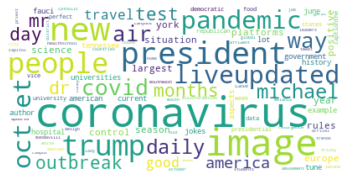

In [22]:


wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color = "white").generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [23]:
df.to_csv(r"/Users/elshadayassefa/Desktop/Fall 2020/CS 4650 Big Data Analytics/HW/HW 5/esassefa_HW5_dataset.csv", header = True)